
![](https://www.iteso.mx/documents/27014/202031/Logo-ITESO-MinimoV.png)

# Departamento de Matemáticas y Física
## Ciencia de datos e inteligencia de negocios
## Proyecto de aplicación: Manejo de Datos, Similitud y Clustering

### Integrantes
- Flavio Cesar Palacios Salas
- Andres Gonzales Luna Diaz del Castillo
- Maximiliano Garcia Mora

### Introducción

    
Actualmente, con los avances en las tecnologías de la información, la
generación de datos de diversos tipos en un solo día tiene volúmenes muy
altos y con tendencia creciente. Con el fin del aprovechamiento de la
información valiosa que pueda estar oculta en los datos que se generan, se
requieren de tener conocimientos básicos de manejo de información y de
análisis exploratorio de datos.  

De forma general, a menos que la persona sea una experta en el fenómeno en
el cual se están generando los datos, el ingeniero que se disponga al análisis
de los datos generados debe de realizar un análisis exploratorio para rescatar
las características básicas que poseen los datos. Además de realizar un
agrupamiento de los mismos datos en base a una característica de interés.

### Objetivo:
El objetivo de este proyecto de aplicación se puede separar en tres
fases:  
1.- La limpieza y extracción de la información estadística básica que
tienen los datos que se están analizando.  
2.- Realización de un agrupamiento (“Clustering”) de los datos en
base a una característica de interés.  
3.- La obtención o formulación de conclusiones sobre el fenómeno del
cual provienen los datos en base a los resultados de los análisis
anteriores  

### Actividades
>**1** Obtención de una base de datos que fuera generada por un
fenómeno de interés (La orientación o tema de los datos será 
especificada para cada equipo por el profesor).  
**2** Aplicar el estudio de calidad de los datos para determinar el tipo
de datos, categorías e información estadística básica.  
**3** Realizar una limpieza de datos y obtener un análisis exploratorio
de datos (EDA) donde se muestren gráficas y conclusiones acerca del
análisis. Al menos obtener 5 insights.  
**4** En base al estudio anterior, realizar un análisis de similitud entre
variables y entre muestras disponibles en su base de datos.  
**5** Crear agrupamientos o “clusters” basados en el algoritmo
“hierarchical clustering” ó “Kmeans”, y presentar sus resultados (si
los datos lo permiten).  
**6** Basados en los análisis anteriores, formular conclusiones sobre la
información importante que se haya logrado encontrar de los datos
analizados.


## Desarrollo del trabajo

### Importación de librerías

In [1]:
import numpy as np
import pandas as pd
from CDIN import CDIN as cd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Bases de datos

In [2]:
data2017 = pd.read_csv('../Data/incidentes-viales-c5-2017.csv')

In [3]:
data2018 = pd.read_csv('../Data/incidentes-viales-c5-2018.csv')

In [4]:
data2019 = pd.read_csv('../Data/incidentes-viales-c5-2019.csv')

La base de datos como indica la descripción contiene accidentes registrados por el C4 un sistema mexicano que registra todos los incidentes de tráfico, en este caso en particular contienen datos entre 2017 y 2019 y fueron obtenidos a través de la siguiente liga: https://datos.cdmx.gob.mx/explore/dataset/incidentes-viales-c5/table/?disjunctive.incidente_c4
Además, contiene las siguientes explicaciones para cada una de las variables:
* folio: una identificación única para cada registro  
* fecha_creacion: fecha de creación  
* hora_creacion: hora de creación  
* dia_semana: día de la semana en que ocurre el incidente  
* codigo_cierre: clasificación interna. La columna puede contener los siguientes códigos.  
    - R: Afirmativo, si el incidente es confirmado por el equipo de emergencias.
    - N: Negativo, si el equipo de emergencias no confirma el incidente en el punto de ubicación.
    - I: Informativo, en caso de que los equipos de atención quieran agregar información extra.
    - F: Falso, si el informe inicial no coincide con los eventos reales.
    - D: Duplicados, registros con código de cierre afirmativo, negativo o falso pero los operadores los identifican  

* fecha_cierre: fecha de cierre, la fecha en la que se resolvió el incidente  
* año_cierre: año de cierre  
* mes_cierre: mes de cierre  
* hora_cierre: tiempo de cierre  
* delegacion_inicio: entidad dentro de la Ciudad de México donde se registró el incidente  
* incidente_c4: una breve explicación sobre el incidente.  
* latitud: latitud del accidente  
* longitud: longitud del accidente  
* clasconf_alarma: código que identifica la gravedad de la situación  
* tipo_entrada: cómo se informó el incidente  
* delegacion_cierre: entidad dentro de la Ciudad de México donde se cerró el incidente  
* geopoint: columnas de latitud y longitud combinadas  
* mes: mes en el que se informó el incidente  

### Data Quality Report

In [5]:
dqr2017 = cd.dqr(data2017)
dqr2017

,Nombres,Data_Types,Missing_values,Present_values,Unique_values,Min,Max
folio,folio,object,0,226535,226535,AO/161231/06182,IZ/171231/06168
fecha_creacion,fecha_creacion,object,0,226535,367,01/01/2017,31/12/2017
hora_creacion,hora_creacion,object,0,226535,74908,00:00:00,23:59:59
dia_semana,dia_semana,object,0,226535,7,Domingo,Viernes
codigo_cierre,codigo_cierre,object,0,226535,5,(A) La unidad de atención a emergencias fue de...,(N) La unidad de atención a emergencias fue de...
fecha_cierre,fecha_cierre,object,0,226535,365,01/01/2017,31/12/2017
año_cierre,año_cierre,int64,0,226535,1,2017,2017
mes_cierre,mes_cierre,object,0,226535,12,Abril,Septiembre
hora_cierre,hora_cierre,object,0,226535,75755,00:00:00,23:59:59
delegacion_inicio,delegacion_inicio,object,4,226531,16,NaN,NaN


In [6]:
dqr2018 = cd.dqr(data2018)
dqr2018

,Nombres,Data_Types,Missing_values,Present_values,Unique_values,Min,Max
folio,folio,object,0,246577,246577,AO/180101/00216,IZ/181231/07496
fecha_creacion,fecha_creacion,object,0,246577,370,01/01/2018,31/12/2018
hora_creacion,hora_creacion,object,0,246577,74916,00:00:00,23:59:59
dia_semana,dia_semana,object,0,246577,7,Domingo,Viernes
codigo_cierre,codigo_cierre,object,0,246577,5,(A) La unidad de atención a emergencias fue de...,(N) La unidad de atención a emergencias fue de...
fecha_cierre,fecha_cierre,object,0,246577,365,01/01/2018,31/12/2018
año_cierre,año_cierre,int64,0,246577,1,2018,2018
mes_cierre,mes_cierre,object,0,246577,12,Abril,Septiembre
hora_cierre,hora_cierre,object,0,246577,75613,00:00:00,23:59:59
delegacion_inicio,delegacion_inicio,object,36,246541,16,NaN,NaN


In [7]:
dqr2019 = cd.dqr(data2019)
dqr2019

,Nombres,Data_Types,Missing_values,Present_values,Unique_values,Min,Max
folio,folio,object,0,207634,207634,AO/190101/03499,IZ/191130/09782
fecha_creacion,fecha_creacion,object,0,207634,475,01/01/2019,31/12/2018
hora_creacion,hora_creacion,object,0,207634,82567,00:00:00,9:59:58
dia_semana,dia_semana,object,0,207634,7,Domingo,Viernes
codigo_cierre,codigo_cierre,object,0,207634,5,(A) La unidad de atención a emergencias fue de...,(N) La unidad de atención a emergencias fue de...
fecha_cierre,fecha_cierre,object,0,207634,459,01/01/2019,31/10/2019
año_cierre,año_cierre,int64,0,207634,1,2019,2019
mes_cierre,mes_cierre,object,0,207634,11,Abril,Septiembre
hora_cierre,hora_cierre,object,0,207634,83826,00:00:01,9:59:55
delegacion_inicio,delegacion_inicio,object,19,207615,16,NaN,NaN


In [8]:
dqr2017.index.to_list() == dqr2018.index.to_list() == dqr2019.index.to_list()

True

In [9]:
dqr2017['Present_values'][0]+dqr2018['Present_values'][0]+dqr2019['Present_values'][0]

680746

Se puede comprobar que los datos de todos los años contienen las mismas columnas y que se pueden usar indistintamente
los datos o inclusive se pueden combinar las tablas, una de las ventajas de los datos es que en la mayoría de estos hay apenas una pequeña cantidad de datos perdidos, alrededor de 500 lo que facilitará el análisis además de que se cuentan con aproximadamente 680,000 datos y no se perderá una parte considerable de la información, en algunos casos alguna de las columnas pueden contener información que puede ser repetitiva o innecesaria debido a que otra de las columnas lo contiene previamente como por ejemplo la columna de geopoint pues contiene los mismos datos que latitud y longitud.

In [89]:
# unir data sets

data = pd.concat([data2017,data2018, data2019])

#quitar datos faltantes (los datos faltantes eran muy pocos comparados con el tamaño del data frame, por lo que los eliminé)

data = data.dropna()
data.reset_index(inplace = True)

### EDA Exploratory Data Analysis

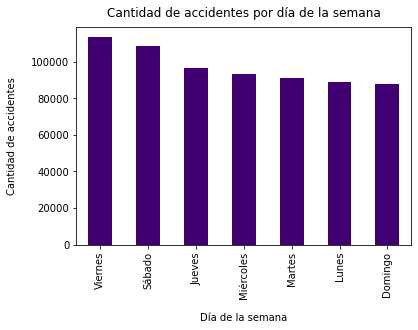

In [6]:
#1.- Numero de accdientes por dia de la semana (dia_semana)

insight1 = (data['dia_semana'].value_counts())

insight1.plot(kind='bar', color = '#410071')

plt.xlabel("Día de la semana", labelpad=14)
plt.ylabel("Cantidad de accidentes", labelpad=14)
plt.title("Cantidad de accidentes por día de la semana", y=1.02)
plt.show()

Aquí se puede observar, como los días de la semana que más accidentes tiene son el viernes y el sábado. Se puede observar como a medida que la semana avanza (comienza en domingo), la cantidad de accidentes aumenta.

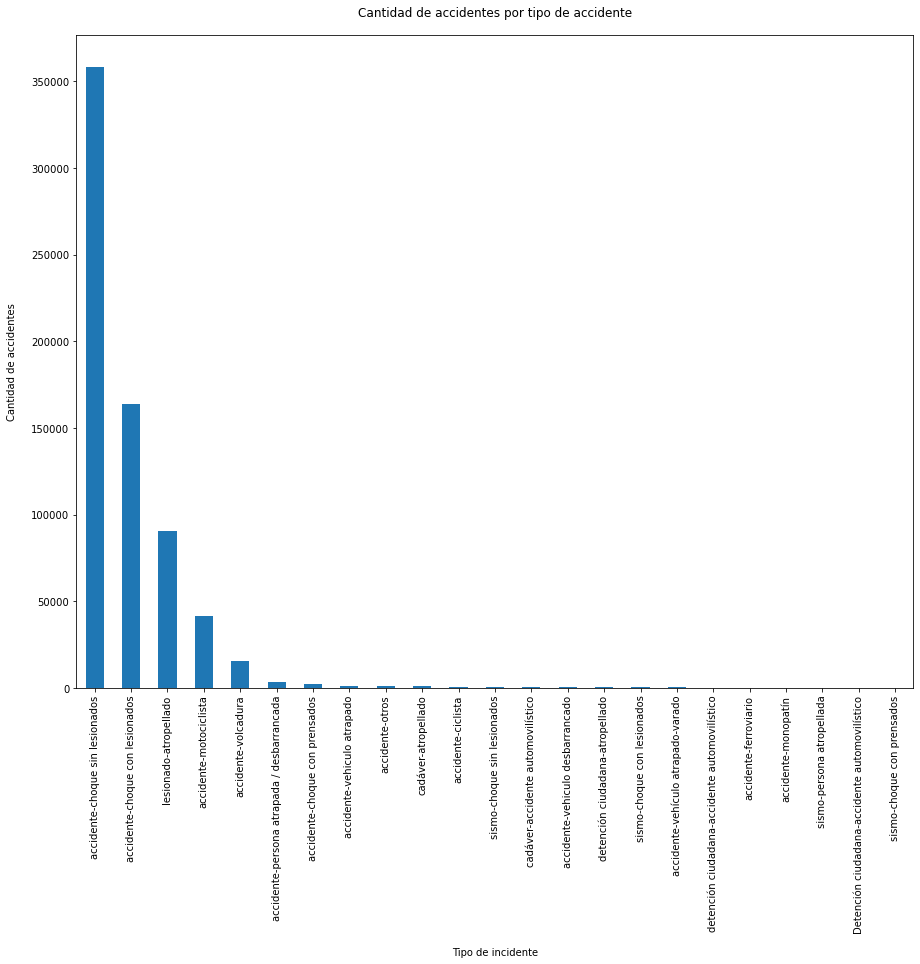

In [6]:
#2. - numero de accidentes por tipo de accidente (incidente_c4)

insight5 = (data['incidente_c4'].value_counts())

plt.figure(figsize=(15,12))
insight5.plot(kind='bar')

plt.xlabel("Tipo de incidente", labelpad=14)
plt.ylabel("Cantidad de accidentes", labelpad=14)
plt.title("Cantidad de accidentes por tipo de accidente", y=1.02)
plt.show()

<div style="text-align: justify">
Se puede observar que la gran mayoría de los accidentes son choques sin lesionados. Después sigue accidentes con choque con lesionados, pero la diferencia es bastante grande. Esto significa que la gran mayoría de los choques son choques leves. También hubo bastante atropellados. Fuera de eso los incidentes se vuelven menos comunes siguiendo un comportamiento logarítmico y apenas hay un par de incidentes para las ultimas categorías como en el caso de los sismos.

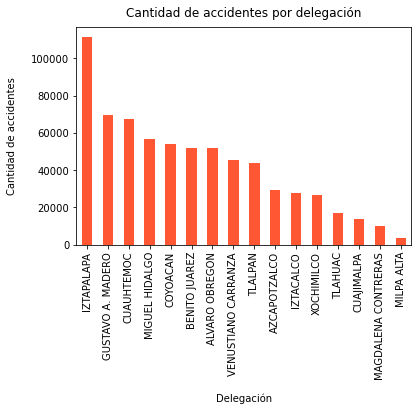

In [8]:
#3.- numero de accidentes por delegacion (delegacion_inicio)

insight2 = (data['delegacion_inicio'].value_counts())



insight2.plot(kind='bar', color = '#FF5733')

plt.xlabel("Delegación", labelpad=14)
plt.ylabel("Cantidad de accidentes", labelpad=14)
plt.title("Cantidad de accidentes por delegación", y=1.02)
plt.show()

Aqui podemos observar cuales son las delegaciones con más accidentes. La delegación de Iztapalapa es el lugar con más accidentes y supera a los demás significativamente, en contraste milpa alta es la delegación que tiene menos incidentes.

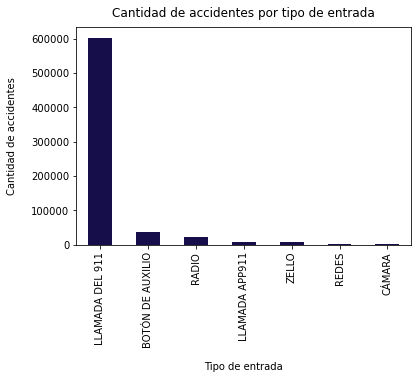

In [9]:
#4.- numero de accidentes por tipo de entrada (tipo_entrada)

insight3 = (data['tipo_entrada'].value_counts())

insight3.plot(kind='bar', color = '#160D4B')

plt.xlabel("Tipo de entrada", labelpad=14)
plt.ylabel("Cantidad de accidentes", labelpad=14)
plt.title("Cantidad de accidentes por tipo de entrada", y=1.02)
plt.show()

El tipo de entrada que se uso para reportar el accidente fue una llamada al 911 por mucho. 

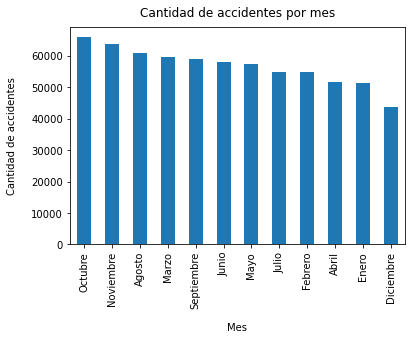

In [10]:
#5.- numero de accidentes por mes (mes_cierre)

insight4 = (data['mes_cierre'].value_counts())

insight4.plot(kind='bar')

plt.xlabel("Mes", labelpad=14)
plt.ylabel("Cantidad de accidentes", labelpad=14)
plt.title("Cantidad de accidentes por mes", y=1.02)
plt.show()

<div style="text-align: justify">
El mes en el que más accidentes hubo fue el de Octubre. Sorprendentemente diciembre fue el mes con menos accidentes. Debido a que la mayoría de los accidentes habían sido por accidentes automovilísticos el sentido común nos indicaba lo contrario porque con las posadas y las fiestas se generarían condiciones para que más gente chocara por ir bajo la influencia del alcohol.

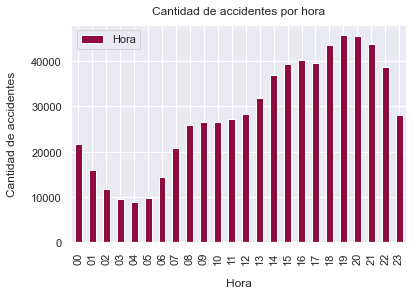

In [90]:
#6.- numero de accidentes por hora (hora_creacion)
data['Hora'] = data['hora_creacion'].str[:2]

data['Hora'] = data['Hora'].apply(lambda x: cd.remove_puntuation(x))

data['Hora'] = data['Hora'].apply(lambda x: cd.zeros(x,2))

i6 = (data['Hora'].value_counts())

i6 = i6.to_frame()

i6 = i6.sort_index()

i6.plot(kind='bar', color = '#900C3F')

plt.xlabel("Hora", labelpad=14)
plt.ylabel("Cantidad de accidentes", labelpad=14)
plt.title("Cantidad de accidentes por hora", y=1.02)
plt.show()

<div style="text-align: justify">
Podemos observar como la mayoría de los accidentes ocurrieron a las 19, 20, 21, 18 y 16 horas. Esto fue sorpresivo ya que se podía esperar que la mayoría de los accidentes ocurrieran a más altas horas de la noche cuando la gente sale de bares y antros. Pero no, ocurrieron a las horas en las que la gente va saliendo del trabajo y el tráfico aumenta. 

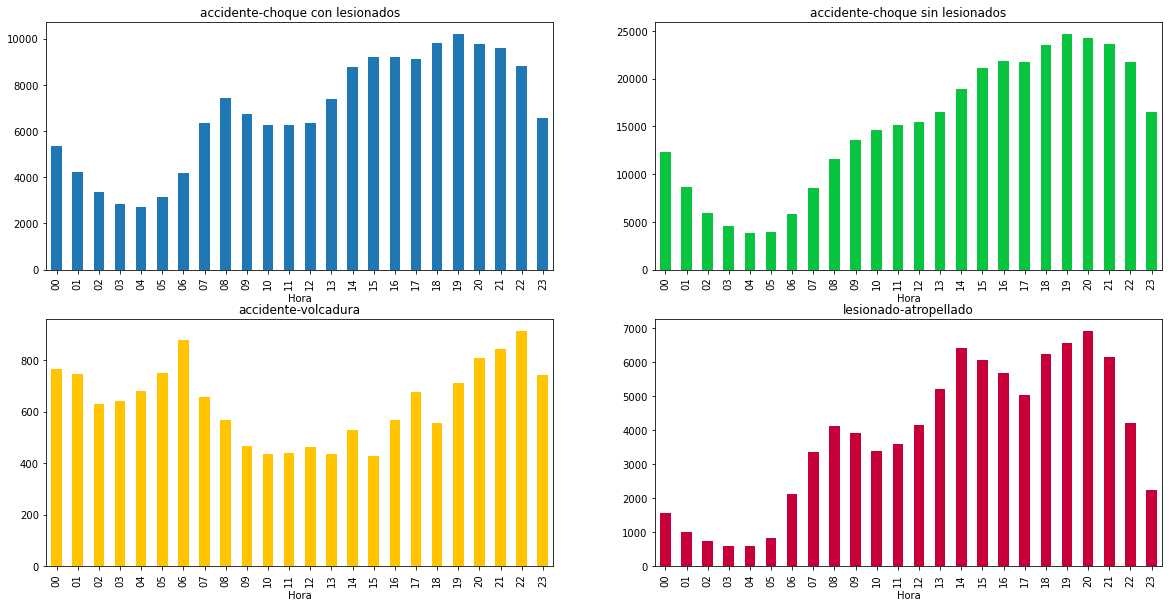

In [12]:
#7.- numero de accidentes por hora  y tipos de accidentes principales (hora_creacion)
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(20,10))
data[data['incidente_c4'] == 'accidente-choque con lesionados'].groupby(['Hora'])['folio'].count().plot(kind = 'bar',
                                                                                                        ax = ax1[0])
data[data['incidente_c4'] == 'accidente-choque sin lesionados'].groupby(['Hora'])['folio'].count().plot(kind = 'bar',
                                                                                              color= '#09C43F',ax = ax1[1])
data[data['incidente_c4'] == 'accidente-volcadura'].groupby(['Hora'])['folio'].count().plot(kind = 'bar', color= '#FFC300',
                                                                                            ax = ax2[0])
data[data['incidente_c4'] == 'lesionado-atropellado'].groupby(['Hora'])['folio'].count().plot(kind = 'bar',color ='#C70039',
                                                                                             ax = ax2[1])
ax1[0].title.set_text('accidente-choque con lesionados')
ax1[1].title.set_text('accidente-choque sin lesionados')
ax2[0].title.set_text('accidente-volcadura')
ax2[1].title.set_text('lesionado-atropellado')
plt.show()

<div style="text-align: justify">
Dada la conclusión anterior resultaba muy particular por lo que al comparar los principales tipos de accidentes se puede observar una mayor tendencia que corresponde a los pensamientos derivados del sentido común, si tomamos los accidentes choque sin lesionados como nuestro control y nos enfocamos en el número de incidentes proporcionales entonces se puede observar que durante las horas de la madrugada se incrementan los accidentes con lesionados y volcadura principalmente aunque en el primer caso sin ser tan drástico como en el del caso de volcaduras, los atropellados no se ven influenciados, posiblemente por la baja movilidad en esas horas y que hay un aporte por el alcohol que sea de relevancia.

In [92]:
alarma = data['clas_con_f_alarma'].unique()

In [93]:
num = np.arange(4)

In [94]:
dit = {alarma[i]: num[i] for i in range(len(alarma))}

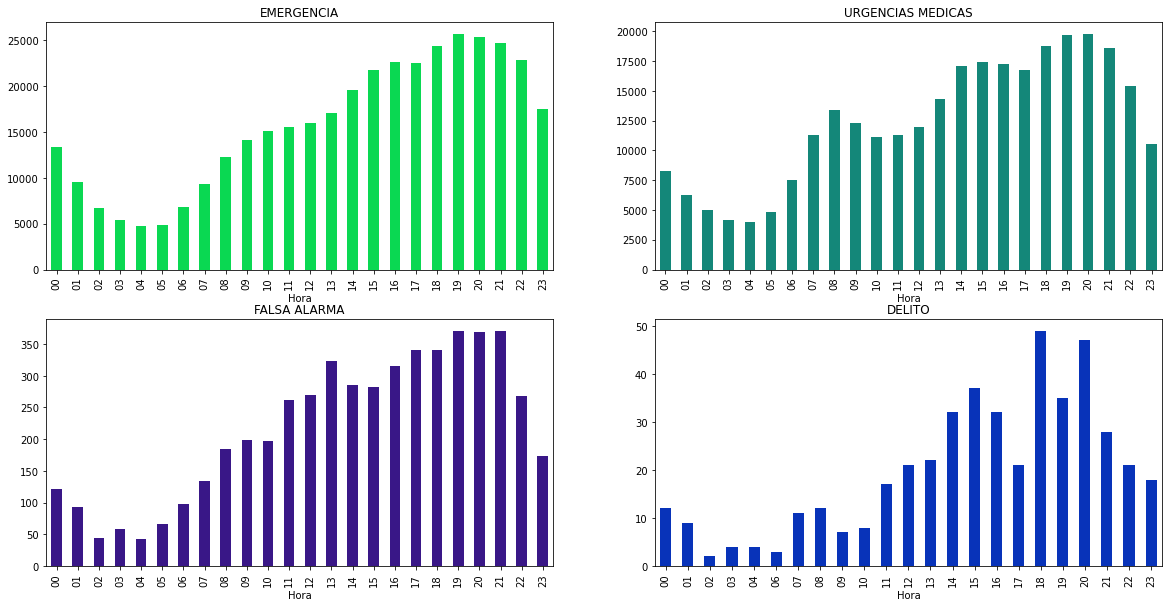

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(20,10))
data[data['clas_con_f_alarma'] == alarma[0]].groupby(['Hora'])['folio'].count().plot(kind = 'bar',color = '#0AD852',
                                                                                                        ax = ax1[0])
data[data['clas_con_f_alarma'] == alarma[1]].groupby(['Hora'])['folio'].count().plot(kind = 'bar',color= '#148779',
                                                                                                    ax = ax1[1])
data[data['clas_con_f_alarma'] == alarma[2]].groupby(['Hora'])['folio'].count().plot(kind = 'bar', color= '#391787',
                                                                                             ax = ax2[0])
data[data['clas_con_f_alarma'] == alarma[3]].groupby(['Hora'])['folio'].count().plot(kind = 'bar',color ='#0833B9',
                                                                                             ax = ax2[1])
ax1[0].title.set_text( alarma[0])
ax1[1].title.set_text( alarma[1])
ax2[0].title.set_text( alarma[2])
ax2[1].title.set_text( alarma[3])
plt.show()

De igual manera quisimos checar si la hora influía en alguna manera en la clasificación de la alarma del incidente, en general todos se comportan de manera similar con una disminución del tipo de alarma hacia la madrugada pero con diferencias en sobre la media tarde, hay un pico de urgencias a las 8 de la mañana mientras que las falsas alarmas tienen el pico hacia la una de la tarde y los delitos a las 3 de la tarde, todas hacia el final de día es donde tienen los valores máximos.

In [17]:
pd.DataFrame(data['clas_con_f_alarma'].value_counts())

,clas_con_f_alarma
EMERGENCIA,377676
URGENCIAS MEDICAS,296907
FALSA ALARMA,5206
DELITO,452


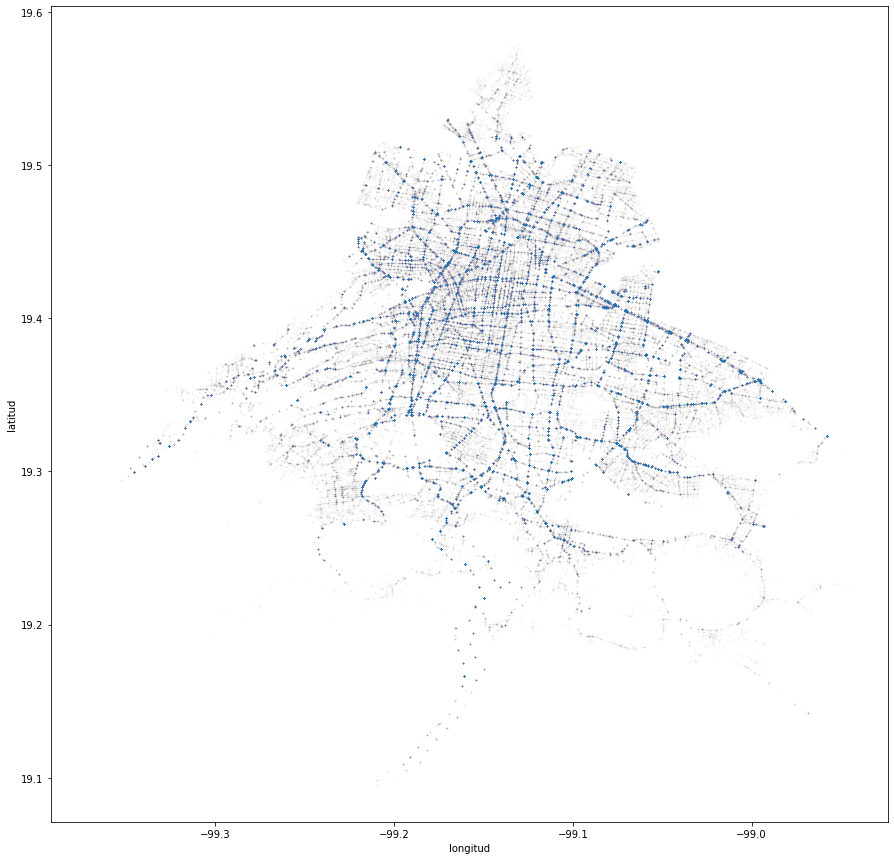

In [59]:
### Visualización de la incidencia espacial de incidentes
plt.figure(figsize = (15,15))
plt.scatter(data['longitud'][:600000],data['latitud'][:600000],alpha = 0.002, s = 3)
plt.xlabel('longitud')
plt.ylabel('latitud')
plt.show()

## Similitud entre los datos

In [10]:
### Convertir la hora en dato númerico continuo
data['hora_creacion'] = data['hora_creacion'].apply(lambda x: cd.remove_puntuation(x))
data['hora_creacion'] = data['hora_creacion'].apply(lambda x: cd.zeros(x,6))
data['hora_creacion'] = data['hora_creacion'].apply(lambda x: int(x[:2])*60 + int(x[2:4])+ int(x[4:])/60)

Si consideramos que la mayor parte de la información esta contenida dentro de los datos que tuvieron alguna de las clasificaciones del C4 como los accidentes o los lesionados, por ello vamos a trabajar con ese subset para poder hacer la medición de la similitud de los datos.

In [96]:
incidentes = insight5[:5].index.to_list()

In [95]:
data['multi_alarma'] = data['clas_con_f_alarma'].apply(lambda x: dit[x])

In [97]:
new_data = pd.concat([data[data['incidente_c4'] == i] for i in incidentes])
new_data.reset_index(inplace = True)

Vamos a considerar como información relevante para comparar nuestros datos el tipo incidente según el código del C4, la hora, la latitud, longitud y la delegación donde fue reportado el incidente, esto también considerando como en algunas otras variables que pudieran ser relevantes a partir del EDA se pudo observar que su distribución es aproximadamente uniforme indistintamente de la condición, debido a la cantidad de datos, el considerar más variables podría hacer que los cálculos se tarden o no se puedan hacer.

### Selección de variables

Debido a que vamos a trabajar con datos mixtos (categóricos y numéricos) procedimos a crear variables dummies para los datos categóricos y finalmente estandarizar los datos para poder sacar la similitud entre las variables.

In [22]:
### Variables de importancia
cols = ['longitud','latitud','hora_creacion','incidente_c4','codigo_cierre','multi_alarma','delegacion_inicio']
incidentes_mixtos = new_data[cols]

#Variables categoricas
cols_cat = ['incidente_c4','codigo_cierre','delegacion_inicio']

#Variables continuas
cols_cont = ['longitud','latitud','hora_creacion','multi_alarma']

In [23]:
### Creación de variables dummies
incidentes_dummy = pd.get_dummies(incidentes_mixtos[cols_cat[0]], prefix = cols_cat[0])

for col in cols_cat[1:]:
    temp = pd.get_dummies(incidentes_mixtos[col], prefix = col)
    incidentes_dummy = incidentes_dummy.join(temp)

del temp

col_list_cat_dummy = incidentes_dummy.columns.to_list()

incidentes_mixtos_dummy = incidentes_mixtos [cols_cont].join(incidentes_dummy)

### Visualización de las variables dummy

In [21]:
incidentes_mixtos_dummy.head()

,longitud,latitud,hora_creacion,incidente_c4_accidente-choque con lesionados,incidente_c4_accidente-choque sin lesionados,incidente_c4_accidente-motociclista,incidente_c4_accidente-volcadura,incidente_c4_lesionado-atropellado,delegacion_inicio_ALVARO OBREGON,delegacion_inicio_AZCAPOTZALCO,...,delegacion_inicio_MILPA ALTA,delegacion_inicio_TLAHUAC,delegacion_inicio_TLALPAN,delegacion_inicio_VENUSTIANO CARRANZA,delegacion_inicio_XOCHIMILCO,"codigo_cierre_(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada","codigo_cierre_(D) El incidente reportado se registró en dos o más ocasiones procediendo a mantener un único reporte (afirmativo, informativo, negativo o falso) como el identificador para el incidente","codigo_cierre_(F) El operador/a o despachador/a identifican, antes de dar respuesta a la emergencia, que ésta es falsa. O al ser despachada una unidad de atención a emergencias en el lugar de los hechos se percatan que el incidente no corresponde al reportado inicialmente",codigo_cierre_(I) El incidente reportado es afirmativo y se añade información adicional al evento,"codigo_cierre_(N) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos, pero en el sitio del evento nadie solicitó el apoyo de la unidad"
0,-99.00732,19.20137,1234.750000,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,-99.03443,19.29659,1001.233333,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,-99.05260,19.43053,824.866667,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,-99.03350,19.38676,1409.016667,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,-99.23910,19.39240,794.716667,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
### Estandarización de los datos
incidentes_std = (incidentes_mixtos_dummy -incidentes_mixtos_dummy.mean(axis = 0))/incidentes_mixtos_dummy.std(axis = 0)
incidentes_std[col_list_cat_dummy] = incidentes_std[col_list_cat_dummy]*(1/np.sqrt(2))

In [17]:
### Importar librerías para las metricas
import scipy.spatial.distance as sc # Metricas de distancia

### Datos de similitud

Finalmente aplicamos a las medidas de similitud de distancia euclidiana y correlación de los datos obteniendo resultados similares en los primeros datos que eran más afines.

In [18]:
### Sublista para poder manejar los datos
accidents_std100 = incidentes_std.loc[0:10000,:]

### Medida de similitud distancia euclideana
euc = sc.pdist(accidents_std100,'euclidean')
euc = sc.squareform(euc)

In [27]:
temp = pd.DataFrame(euc)

In [29]:
temp

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,0.000000,11.011672,11.134514,10.662400,11.295041,12.184000,10.778318,12.446406,10.339974,11.539185,...,11.157067,11.132933,11.562295,11.179205,11.674936,11.376314,11.152218,11.476539,11.724297,11.114874
1,11.011672,0.000000,6.149774,5.610629,6.343125,8.015154,5.654624,8.242294,5.011761,6.667178,...,6.179619,6.094011,6.788158,6.279260,6.927035,6.454599,6.175040,6.439787,6.825434,2.297486
2,11.134514,6.149774,0.000000,4.464125,5.377716,7.558106,3.699655,6.870450,4.342055,4.497195,...,2.498344,5.142280,5.490895,1.445485,5.008518,4.092799,2.630024,4.656315,5.536608,6.525223
3,10.662400,5.610629,4.464125,0.000000,5.298067,7.396298,3.397489,7.232998,2.254685,5.005785,...,3.717656,5.105779,5.381922,4.357247,5.927293,4.248587,3.936104,4.439558,5.921970,5.373620
4,11.295041,6.343125,5.377716,5.298067,0.000000,6.475262,4.824259,6.131132,4.575857,2.547920,...,5.069526,3.766362,5.850538,5.102439,5.747215,5.263387,4.736187,4.698461,4.918118,7.149204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,11.376314,6.454599,4.092799,4.248587,5.263387,7.635483,4.326857,6.753715,4.438866,4.096422,...,4.480468,5.215381,6.078106,3.815742,5.580799,0.000000,4.671764,3.468936,5.770133,6.852745
9997,11.152218,6.175040,2.630024,3.936104,4.736187,7.136201,4.459634,6.733179,4.325470,4.643670,...,0.770565,4.648452,5.158343,2.497853,5.606142,4.671764,0.000000,4.005099,5.375114,6.228599
9998,11.476539,6.439787,4.656315,4.439558,4.698461,7.233709,4.298212,6.762871,4.680063,4.568696,...,4.123582,4.529764,4.558265,4.923039,5.040486,3.468936,4.005099,0.000000,4.735914,6.687500
9999,11.724297,6.825434,5.536608,5.921970,4.918118,7.375420,5.090479,7.165697,5.248264,5.319908,...,5.555884,4.769820,5.634458,5.811601,5.610426,5.770133,5.375114,4.735914,0.000000,7.693442


In [30]:
D1 = temp.iloc[:,0]
D1_sort = np.sort(D1)

D1_index = np.argsort(D1)

In [31]:
D1_index[2]

4146

In [32]:
new_data.iloc[0,:]

level_0                                                              0
index                                                                0
folio                                                  C5/170622/06952
fecha_creacion                                              22/06/2017
hora_creacion                                                  1234.75
dia_semana                                                      Jueves
codigo_cierre        (D) El incidente reportado se registró en dos ...
fecha_cierre                                                22/06/2017
año_cierre                                                        2017
mes_cierre                                                       Junio
hora_cierre                                                   20:39:42
delegacion_inicio                                           MILPA ALTA
incidente_c4                           accidente-choque sin lesionados
latitud                                                        19.2014
longit

In [33]:
new_data.iloc[4146,:]

level_0                                                           7788
index                                                             7789
folio                                                  C5/170814/05602
fecha_creacion                                              14/08/2017
hora_creacion                                                  1091.95
dia_semana                                                       Lunes
codigo_cierre        (D) El incidente reportado se registró en dos ...
fecha_cierre                                                14/08/2017
año_cierre                                                        2017
mes_cierre                                                      Agosto
hora_cierre                                                   18:29:37
delegacion_inicio                                           MILPA ALTA
incidente_c4                           accidente-choque sin lesionados
latitud                                                        19.1952
longit

Se puede observar que con este ejemplo estos dos incidentes tienen aproximadamente el mismo comportamiento, son accidentes de tipo choque sin lesionados, en la delegación milpa alta, con coordenadas similares y que fueron reportados aproximadamente a la misma hora aunque con día y hora de diferencia

In [34]:
### Medida de similitud con correlacion
corr = sc.pdist(accidents_std100,'correlation')
corr = sc.squareform(corr)

In [35]:
temp2 = pd.DataFrame(corr)
D2 = temp2.iloc[:,0]
D2_sort = np.sort(D2)

D2_index = np.argsort(D2)

In [36]:
comp = pd.concat([D2_index,D1_index], axis = 1)
comp

,0,0
0,0,0
1,5720,5720
2,4146,4146
3,7947,7947
4,1349,1349
...,...,...
9996,1158,5086
9997,2075,1423
9998,4281,9601
9999,279,5001


Con esta comparativa se puede observar cómo se obtienen resultados similares por lo menos dentro de los primeros valores que son los más relevantes por ser los más cercanos si se utilizan tanto la métrica euclidiana como la correlación.

### Clustering

La mayor parte de los datos son variables categoricas por lo que hacer clustering con cualquiera de las tecnicas aprendidas dentro del curso como clustering jerarquico o Kmeans no podría realizarse ya que esos algoritmos están reservados exclusivamente para datos categoricos, dentro de las variables númericas con las que si podemos contar de las que más destacan son la longitud y latitud de donde se iniciarón las llamadas de emergencia por lo que serán las variables que utilizaremos para el clustering

Decidimos de utilizar el algoritmo de clustering de Kmeans debido a la gran cantidad de datos ya que hacer el algoritmo de clustering jerárquico al ser un método exhaustivo tardaría demasiado tiempo en computarse y posiblemente la memoria se desbordaría.

Para delimitar el número optimo de grupos en base a nuestros datos utilizamos el criterio del codo el cuál nos quedo de la siguiente forma:


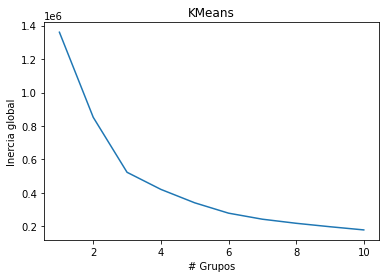

In [37]:
### criterio del codo
data_clust = data[['latitud','longitud']]


data_std = (data_clust-data_clust.mean(axis=0))/data_clust.std(axis=0)


inercias = np.zeros(10)
for k in np.arange(10)+1:
    model = KMeans(n_clusters=k,init = 'random')
    model = model.fit(data_std)
    inercias[k-1] = model.inertia_
    
plt.plot(np.arange(1,11),inercias)
plt.title('KMeans')
plt.xlabel('# Grupos')
plt.ylabel('Inercia global')
plt.show()

Como se puede ver en la inercia global cuando se alcanzan 3 grupos la tendencia cambia y por tanto decidimos seleccionar ese valor como nuestro número de grupos para hacer el clustering.

In [38]:
# clustering
model = KMeans(n_clusters = 3, init = 'k-means++')
model = model.fit(data_std)
grupo = model.predict(data_std)
centroides = model.cluster_centers_

Después de realizar el clustering utilizando como inicialización K-means ++ para evitar que los centroides inicien en un punto alejado y los resultados no sean los más adecuados se obtuvo el siguiente resultado.

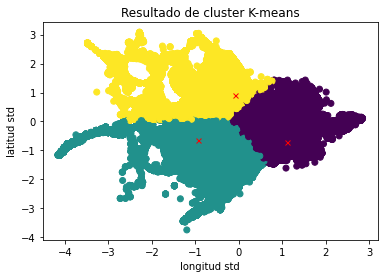

In [40]:
#visualización de los resultados
plt.scatter(data_std['latitud'],data_std['longitud'],c = grupo)
plt.plot(centroides[:300000,1],centroides[:300000,0],'rx', ms =5)
plt.title('Resultado de cluster K-means')
plt.ylabel('latitud std')
plt.xlabel('longitud std')
plt.show()

### Conclusiones

Pudimos hacer un análisis de la base de datos de accidentes que se nos proporcionó. Fue muy interesante trabajar con datos reales y una base tan grande e ir adentrándose en los datos que albergaba, su composición y entenderlos. Estaba bastante completa por lo que no fue necesario limpiarla tanto. Hicimos el EDA, de donde creemos que encontramos interesantes conclusiones que posteriormente nos sirvió para encontrar los índices de similitud e hicimos el clustering. Con todo esto pudimos ver que había tres clusters en los cuáles podíamos organizar parte de la información. 

En el análisis de los grupos que nos tocó, el problema fue que se tuvieron tomar la latitud y longitud, que eran de los datos más relevantes para tomar en cuenta para el clustering y que se perdió información valiosa ya que no se toman en cuenta todas las variables que habíamos visto anteriormente en el EDA y en la similitud de los datos. Consideramos que en líneas generales fue un muy buen proyecto, ya que aplicamos todo lo que hemos aprendido en los módulos.


In [99]:
cierre = data['codigo_cierre'].unique()
Newcierre = ['D','N','A','F','I']

In [100]:
dit2 = {cierre[i]: Newcierre[i] for i in range(len(cierre))}

In [101]:
data['newcodigo_cierre'] = data['codigo_cierre'].apply(lambda x: dit2[x])

In [111]:
hlatitud = round((data['latitud'].max()-data['latitud'].min())/10,4)
minla = data['latitud'].min()

In [112]:
flatitud = lambda x: 1 if x < minla + hlatitud else (2 if x < minla + 2*hlatitud else (3 if x < minla + 3*hlatitud else (4 if x < minla + 4*hlatitud else (5 if x < minla + 5*hlatitud else (6 if x < minla + 6*hlatitud else (7 if x < minla + 7*hlatitud else (8 if x < minla + 8*hlatitud else (9 if x < minla + 9*hlatitud else 10))))))))

In [113]:
hlongitud = round((data['longitud'].max()-data['longitud'].min())/10,4)
minlo = data['longitud'].min()

In [114]:
flongitud = lambda x: 1 if x < minlo + hlongitud else (2 if x < minlo + 2*hlongitud else (3 if x < minlo + 3*hlongitud else (4 if x < minlo + 4*hlongitud else (5 if x < minlo + 5*hlongitud else (6 if x < minlo + 6*hlongitud else (7 if x < minlo + 7*hlongitud else (8 if x < minlo + 8*hlongitud else (9 if x < minlo + 9*hlongitud else 10))))))))

In [115]:
data['newlatitud'] = data['latitud'].apply(lambda x: flatitud(x))

In [116]:
data['newlongitud'] = data['longitud'].apply(lambda x: flongitud(x))

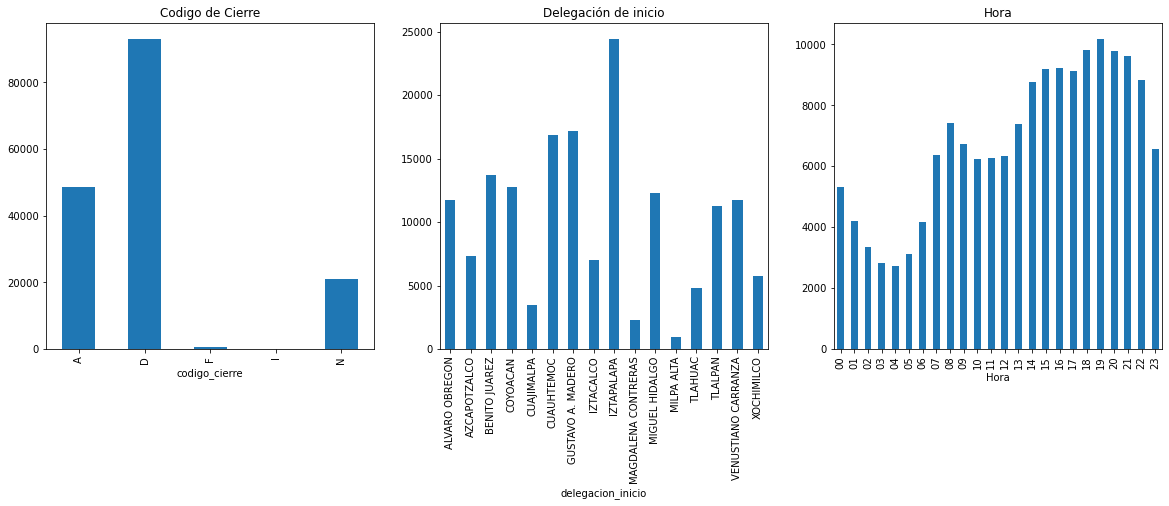

In [134]:
fig, (ax1) = plt.subplots(1, 3, figsize=(20,6))
data[data['incidente_c4'] == 'accidente-choque con lesionados'].groupby(['codigo_cierre'])['folio'].count().plot(kind = 'bar',
                                                                                                        ax = ax1[0])
data[data['incidente_c4'] == 'accidente-choque con lesionados'].groupby(['delegacion_inicio'])['folio'].count().plot(kind = 'bar',
                                                                                                        ax = ax1[1])
data[data['incidente_c4'] == 'accidente-choque con lesionados'].groupby(['Hora'])['folio'].count().plot(kind = 'bar',
                                                                                                        ax = ax1[2])
ax1[0].title.set_text( 'Codigo de Cierre')
ax1[1].title.set_text( 'Delegación de inicio')
ax1[2].title.set_text( 'Hora')
plt.show()

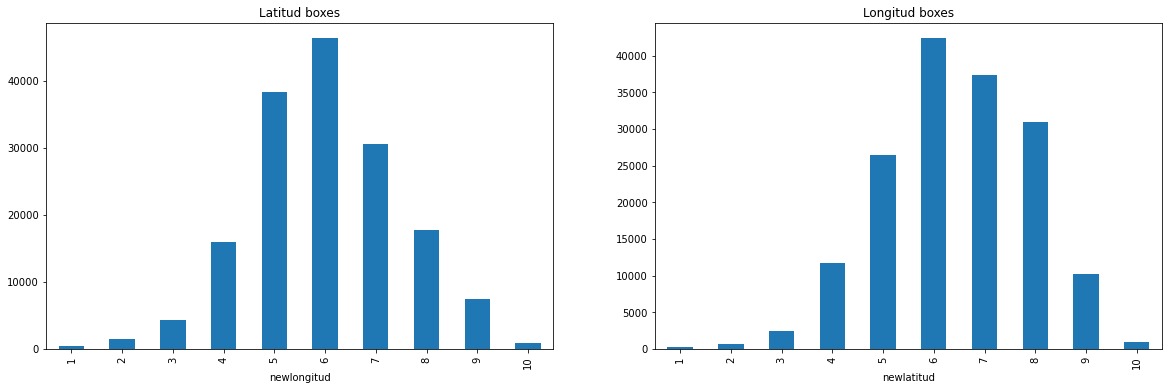

In [157]:
fig, (ax1) = plt.subplots(1, 2, figsize=(20,6))
data[data['incidente_c4'] == 'accidente-choque con lesionados'].groupby(['newlongitud'])['folio'].count().plot(kind = 'bar',
                                                                                                        ax = ax1[0])
data[data['incidente_c4'] == 'accidente-choque con lesionados'].groupby(['newlatitud'])['folio'].count().plot(kind = 'bar',
                                                                                                        ax = ax1[1])
ax1[0].title.set_text( 'Latitud boxes')
ax1[1].title.set_text( 'Longitud boxes')
plt.show()

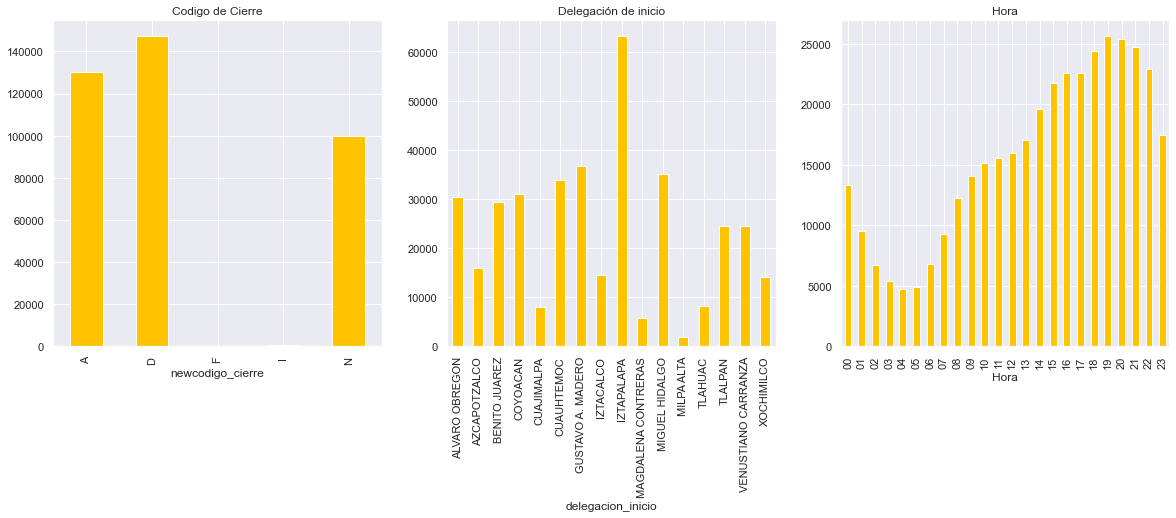

In [107]:
fig, (ax1) = plt.subplots(1, 3, figsize=(20,6))
data[data['multi_alarma'] == 0].groupby(['newcodigo_cierre'])['folio'].count().plot(kind = 'bar', color='#FFC300',
                                                                                                        ax = ax1[0])
data[data['multi_alarma'] == 0].groupby(['delegacion_inicio'])['folio'].count().plot(kind = 'bar',color='#FFC300',
                                                                                                        ax = ax1[1])
data[data['multi_alarma'] == 0].groupby(['Hora'])['folio'].count().plot(kind = 'bar',color = '#FFC300',
                                                                                                        ax = ax1[2])
ax1[0].title.set_text( 'Codigo de Cierre')
ax1[1].title.set_text( 'Delegación de inicio')
ax1[2].title.set_text( 'Hora')
plt.show()

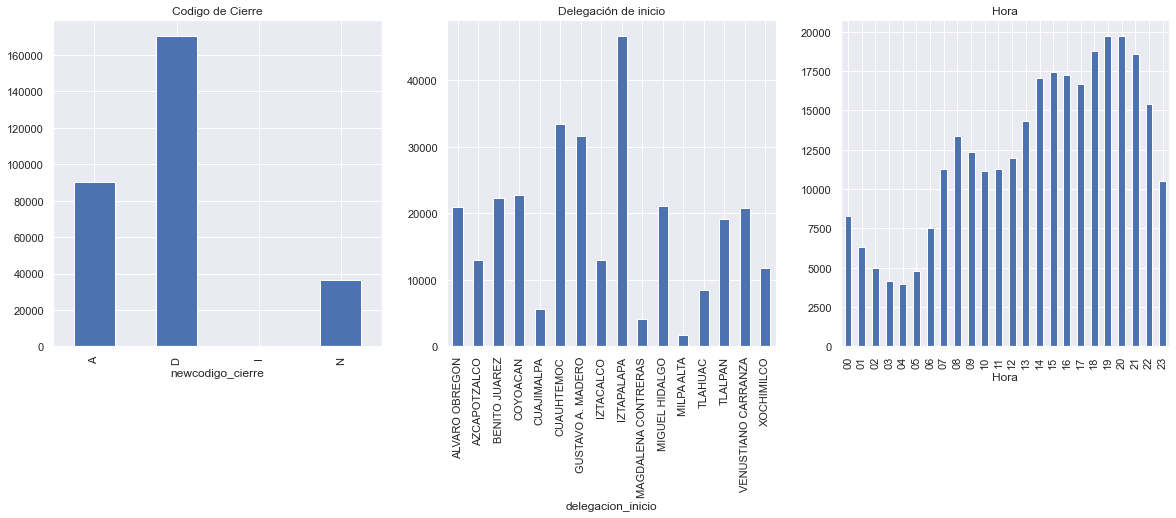

In [103]:
fig, (ax1) = plt.subplots(1, 3, figsize=(20,6))
data[data['multi_alarma'] == 1].groupby(['newcodigo_cierre'])['folio'].count().plot(kind = 'bar',
                                                                                                        ax = ax1[0])
data[data['multi_alarma'] == 1].groupby(['delegacion_inicio'])['folio'].count().plot(kind = 'bar',
                                                                                                        ax = ax1[1])
data[data['multi_alarma'] == 1].groupby(['Hora'])['folio'].count().plot(kind = 'bar',
                                                                                                        ax = ax1[2])
ax1[0].title.set_text( 'Codigo de Cierre')
ax1[1].title.set_text( 'Delegación de inicio')
ax1[2].title.set_text( 'Hora')
plt.show()

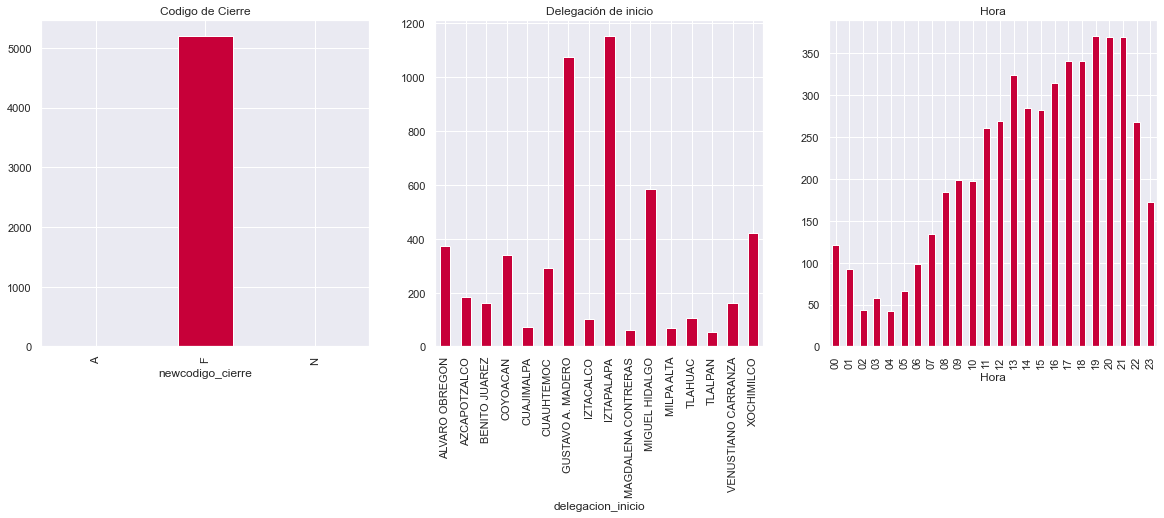

In [109]:
fig, (ax1) = plt.subplots(1, 3, figsize=(20,6))
data[data['multi_alarma'] == 2].groupby(['newcodigo_cierre'])['folio'].count().plot(kind = 'bar',color = '#C70039',
                                                                                                        ax = ax1[0])
data[data['multi_alarma'] == 2].groupby(['delegacion_inicio'])['folio'].count().plot(kind = 'bar',color = '#C70039',
                                                                                                        ax = ax1[1])
data[data['multi_alarma'] == 2].groupby(['Hora'])['folio'].count().plot(kind = 'bar',color = '#C70039',
                                                                                                        ax = ax1[2])
ax1[0].title.set_text( 'Codigo de Cierre')
ax1[1].title.set_text( 'Delegación de inicio')
ax1[2].title.set_text( 'Hora')
plt.show()

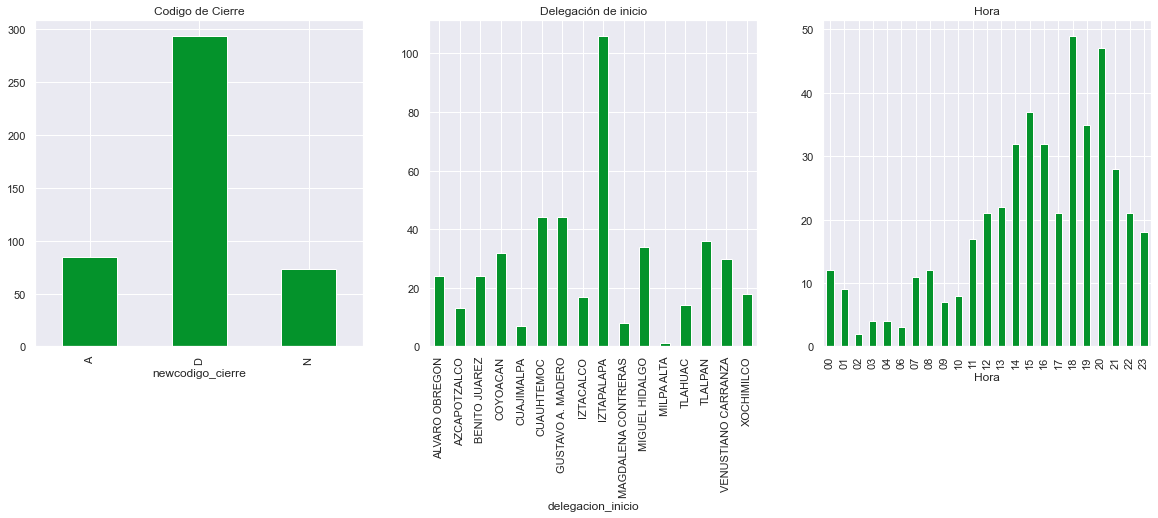

In [110]:
fig, (ax1) = plt.subplots(1, 3, figsize=(20,6))
data[data['multi_alarma'] == 3].groupby(['newcodigo_cierre'])['folio'].count().plot(kind = 'bar',color = '#04932B',
                                                                                                        ax = ax1[0])
data[data['multi_alarma'] == 3].groupby(['delegacion_inicio'])['folio'].count().plot(kind = 'bar',color = '#04932B',
                                                                                                        ax = ax1[1])
data[data['multi_alarma'] == 3].groupby(['Hora'])['folio'].count().plot(kind = 'bar',color = '#04932B',
                                                                                                        ax = ax1[2])
ax1[0].title.set_text( 'Codigo de Cierre')
ax1[1].title.set_text( 'Delegación de inicio')
ax1[2].title.set_text( 'Hora')
plt.show()

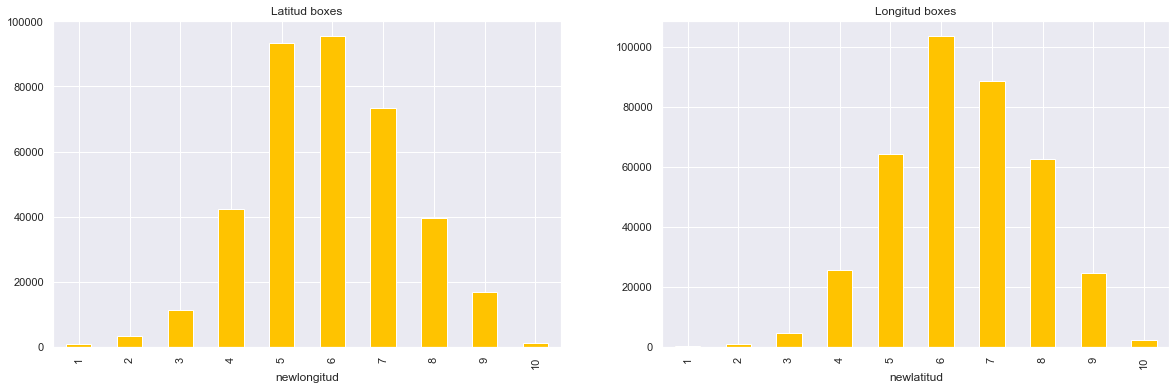

In [121]:
fig, (ax1) = plt.subplots(1, 2, figsize=(20,6))
data[data['multi_alarma'] == 0].groupby(['newlongitud'])['folio'].count().plot(kind = 'bar',color='#FFC300',
                                                                                                        ax = ax1[0])
data[data['multi_alarma'] == 0].groupby(['newlatitud'])['folio'].count().plot(kind = 'bar',color='#FFC300',
                                                                                                        ax = ax1[1])
ax1[0].title.set_text( 'Latitud boxes')
ax1[1].title.set_text( 'Longitud boxes')
plt.show()

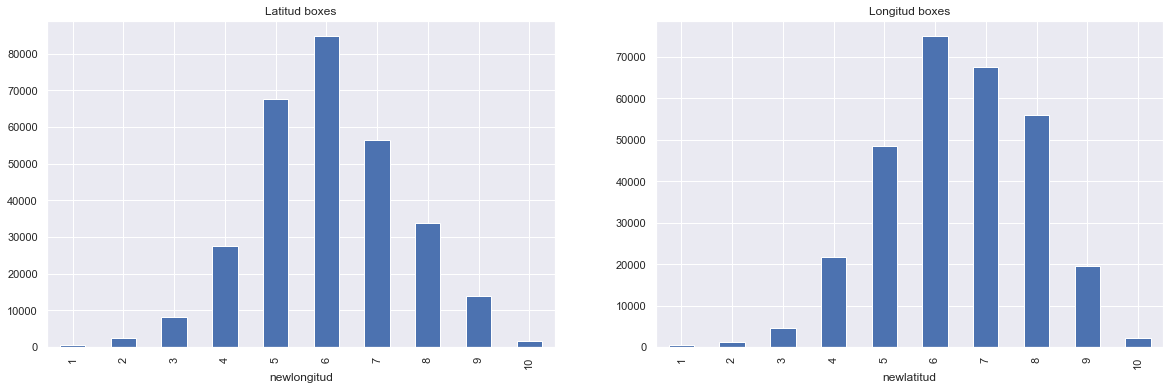

In [118]:
fig, (ax1) = plt.subplots(1, 2, figsize=(20,6))
data[data['multi_alarma'] == 1].groupby(['newlongitud'])['folio'].count().plot(kind = 'bar',
                                                                                                        ax = ax1[0])
data[data['multi_alarma'] == 1].groupby(['newlatitud'])['folio'].count().plot(kind = 'bar',
                                                                                                        ax = ax1[1])
ax1[0].title.set_text( 'Latitud boxes')
ax1[1].title.set_text( 'Longitud boxes')
plt.show()

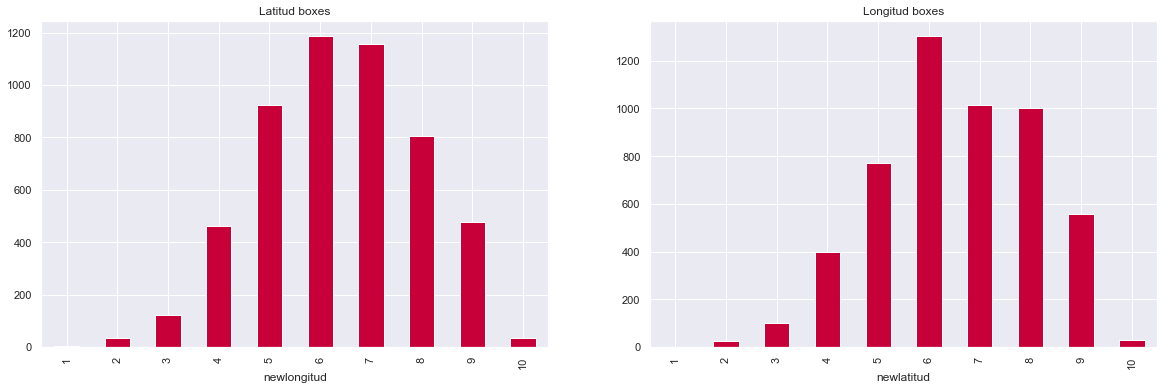

In [122]:
fig, (ax1) = plt.subplots(1, 2, figsize=(20,6))
data[data['multi_alarma'] == 2].groupby(['newlongitud'])['folio'].count().plot(kind = 'bar',color = '#C70039',
                                                                                                        ax = ax1[0])
data[data['multi_alarma'] == 2].groupby(['newlatitud'])['folio'].count().plot(kind = 'bar',color = '#C70039',
                                                                                                        ax = ax1[1])
ax1[0].title.set_text( 'Latitud boxes')
ax1[1].title.set_text( 'Longitud boxes')
plt.show()

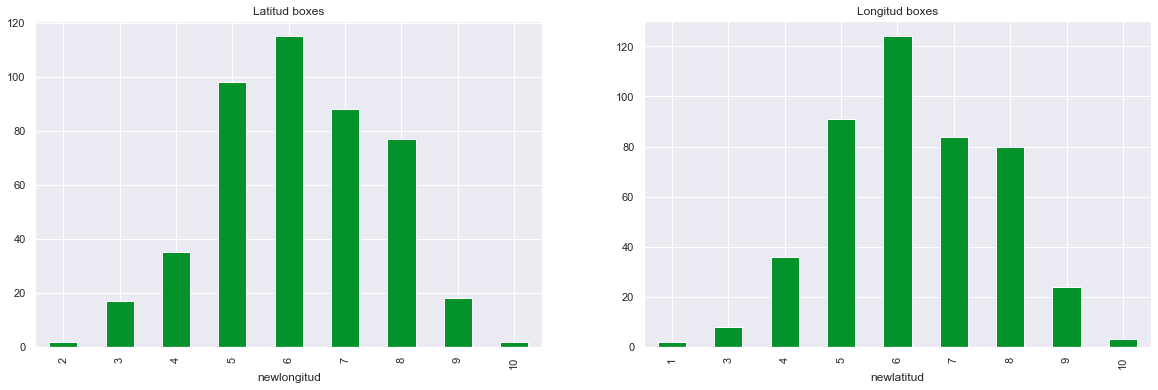

In [123]:
fig, (ax1) = plt.subplots(1, 2, figsize=(20,6))
data[data['multi_alarma'] == 3].groupby(['newlongitud'])['folio'].count().plot(kind = 'bar',color = '#04932B',
                                                                                                        ax = ax1[0])
data[data['multi_alarma'] == 3].groupby(['newlatitud'])['folio'].count().plot(kind = 'bar',color = '#04932B',
                                                                                                        ax = ax1[1])
ax1[0].title.set_text( 'Latitud boxes')
ax1[1].title.set_text( 'Longitud boxes')
plt.show()

In [85]:
pd.DataFrame(data.loc[350000:375000,:].groupby(['multi_alarma','newcodigo_cierre'])['folio'].count())

folio
multi_alarma newcodigo_cierre       
0            A                  4279
             D                  5729
             F                     1
             I                     9
             N                  3860
1            A                  3084
             D                  6480
             I                     4
             N                  1380
2            F                   112
3            A                    15
             D                    40
             N                     8

In [84]:
pd.DataFrame(data = data.loc[350000:375000,:].groupby(['incidente_c4','newcodigo_cierre'])['folio'].count())

folio
incidente_c4                    newcodigo_cierre       
accidente-choque con lesionados A                  1730
                                D                  3616
                                F                    15
                                I                     4
                                N                   841
...                                                 ...
sismo-choque sin lesionados     A                    37
                                D                    55
                                F                     1
                                N                    10
sismo-persona atropellada       D                     3

[61 rows x 1 columns]

### Modelos

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score

In [55]:
Y = incidentes_mixtos_dummy.loc[350000:375000,'multi_alarma'].values

In [56]:
X = incidentes_std.loc[350000:375000,:].drop('multi_alarma', axis = 1).values

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 0 )

In [59]:
modelo = LogisticRegression(random_state = 0,max_iter=200, C= 0.001,multi_class='ovr', solver='liblinear')
modelo.fit(X_train, y_train)

### Predicción de los datos de test

y_pred= modelo.predict(X_test)

In [63]:
#### Evaluar el modelo
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')

accuraccy = accuracy_score(y_test, y_pred)

recall = recall_score(y_test, y_pred, average='micro')

In [61]:
### Matriz de confusion
pd.DataFrame(cm)

,0,1,2
0,1694,0,0
1,0,3282,0
2,0,0,25


In [64]:
### Medidas de ajuste del modelo
pd.DataFrame(data = [precision,accuraccy,recall], columns = ['valor'], index = ['precision','accuracy','recall'])

,valor
precision,1.0
accuracy,1.0
recall,1.0
